In [1]:
from sampler import sample_time, convert_to_minutes, generate_beta_dist
from API_KEY import api_key
import googlemaps
import requests
import json
import pandas as pd
import os
import gmplot
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
api = api_key()
gmaps = googlemaps.Client(key=api_key())

In [3]:
beg_time, end_time = convert_to_minutes(12,24)
r = generate_beta_dist()
num_orders = 100

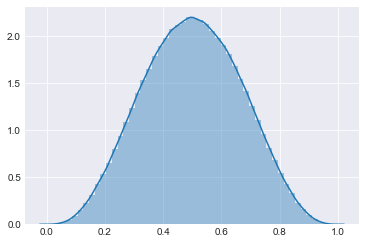

In [5]:
sns.distplot(r)

In [291]:
generate_times = sample_time(beg_time, end_time, r, num_orders)

In [292]:
generate_times.change_in_time()

720


In [293]:
a = generate_times.create_order_times()

In [294]:
datetime(2020, 4, 19, 12) + timedelta(hours=6)

datetime.datetime(2020, 4, 19, 18, 0)

In [295]:
sample_times = np.repeat(datetime(2020, 4, 19, 12), len(a)) + [timedelta(hours=x/60) for x in a]

In [296]:
sample_times.sort()

##### * Add a variable for bundles (20-30 min)
##### * Add a variable for $4 delivery

In [297]:
sample_times

array([datetime.datetime(2020, 4, 19, 13, 49, 53, 678514),
       datetime.datetime(2020, 4, 19, 14, 6, 46, 496420),
       datetime.datetime(2020, 4, 19, 14, 22, 30, 844216),
       datetime.datetime(2020, 4, 19, 14, 30, 55, 364998),
       datetime.datetime(2020, 4, 19, 14, 42, 18, 217743),
       datetime.datetime(2020, 4, 19, 14, 56, 0, 398769),
       datetime.datetime(2020, 4, 19, 15, 1, 3, 713526),
       datetime.datetime(2020, 4, 19, 15, 2, 51, 56252),
       datetime.datetime(2020, 4, 19, 15, 6, 44, 457761),
       datetime.datetime(2020, 4, 19, 15, 8, 6, 690358),
       datetime.datetime(2020, 4, 19, 15, 8, 17, 723249),
       datetime.datetime(2020, 4, 19, 15, 9, 49, 17832),
       datetime.datetime(2020, 4, 19, 15, 10, 3, 109764),
       datetime.datetime(2020, 4, 19, 15, 12, 7, 262831),
       datetime.datetime(2020, 4, 19, 15, 21, 12, 69843),
       datetime.datetime(2020, 4, 19, 15, 24, 49, 177419),
       datetime.datetime(2020, 4, 19, 15, 27, 29, 348070),
       datet

In [11]:
location_ = os.getcwd() + '\\address_data\\ca\\ab\\city_of_red_deer.csv'

In [12]:
rd = pd.read_csv(location_)

In [13]:
rd

,LON,LAT,NUMBER,STREET,UNIT,CITY,DISTRICT,REGION,POSTCODE,ID,HASH
0,-113.769562,52.244131,1,ABEL CL,NaN,NaN,NaN,NaN,NaN,NaN,337be5934703dd63
1,-113.783018,52.242337,1,AINSWORTH CR,NaN,NaN,NaN,NaN,NaN,NaN,663543b88ab20de2
2,-113.771100,52.249808,1,ALEXANDER CR,NaN,NaN,NaN,NaN,NaN,NaN,158228bbdb9cbbac
3,-113.789997,52.247050,1,ALLAN ST,NaN,NaN,NaN,NaN,NaN,NaN,c8c24953c455462f
4,-113.785442,52.244930,1,ALLSOP AV,NaN,NaN,NaN,NaN,NaN,NaN,b011678dae9236b5
...,...,...,...,...,...,...,...,...,...,...,...
55065,-113.808717,52.264765,4501,48 AV,610,NaN,NaN,NaN,NaN,NaN,de5ffc7478b7bc2e
55066,-113.808725,52.264958,4501,48 AV,613,NaN,NaN,NaN,NaN,NaN,8cf4dcbdbf3beb01
55067,-113.808729,52.265041,4501,48 AV,614,NaN,NaN,NaN,NaN,NaN,fe682c3c179d1937
55068,-113.808483,52.265046,4501,48 AV,615,NaN,NaN,NaN,NaN,NaN,3951807fc70b91cf


In [14]:
test_directions = gmaps.distance_matrix(origins=(52.283877, -113.807013), destinations=[(52.285842,-113.7686521),(52.265046,-113.808483)], mode='driving')

In [15]:
test_directions

{'destination_addresses': ['5 Clearview Market Way, Red Deer, AB T4P 0M9, Canada',
  '4515 48 Ave, Red Deer, AB T4N 3S7, Canada'],
 'origin_addresses': ['4657 62 St, Red Deer, AB T4N 2R4, Canada'],
 'rows': [{'elements': [{'distance': {'text': '3.8 km', 'value': 3825},
     'duration': {'text': '6 mins', 'value': 354},
     'status': 'OK'},
    {'distance': {'text': '3.4 km', 'value': 3427},
     'duration': {'text': '8 mins', 'value': 474},
     'status': 'OK'}]}],
 'status': 'OK'}

In [16]:
rd[['LON', 'LAT']].sample(n=100)

,LON,LAT
32524,-113.805340,52.273135
25899,-113.767140,52.273218
51097,-113.779708,52.262448
50721,-113.815100,52.280722
38095,-113.780928,52.232924
...,...,...
51,-113.832218,52.308101
46943,-113.806156,52.268722
36528,-113.827632,52.261535
2724,-113.771779,52.262434


In [17]:
print ('Taking order - 5.8km away - 12 minutes')

Taking order - 5.8km away - 12 minutes


In [18]:
sample_times[0:3]

array([datetime.datetime(2020, 4, 19, 13, 18, 5, 203053),
       datetime.datetime(2020, 4, 19, 14, 35, 44, 385349),
       datetime.datetime(2020, 4, 19, 14, 39, 25, 29467)], dtype=object)

In [19]:
def generate_bundle(bundle, counter):
    print (2)

In [20]:
print (sample_times[0])
print (sample_times[1])

2020-04-19 13:18:05.203053
2020-04-19 14:35:44.385349


In [21]:
sample_times[1] - sample_times[0]

datetime.timedelta(0, 4659, 182296)

In [22]:
t = sample_times[1] - sample_times[0]
t.seconds / 60

77.65

In [373]:
test_order_times = sample_times[0:3]

In [375]:
test_order_times

array([datetime.datetime(2020, 4, 19, 13, 49, 53, 678514),
       datetime.datetime(2020, 4, 19, 14, 6, 46, 496420),
       datetime.datetime(2020, 4, 19, 14, 22, 30, 844216)], dtype=object)

In [541]:
def sample_address(n, rd):
    address_sample = rd[['LAT', 'LON']].sample(n=n)
    address_sample = [tuple(x) for x in address_sample.values]
    return address_sample

def generate_payload(current_bundle):
    locations_ = sample_address(len(current_bundle), rd)
    google_output = gmaps.distance_matrix(origins=(52.283877, -113.807013), destinations=locations_, mode='driving')
    return google_output

def sla_evaluation(current_bundle, directions, bundle_time, met_sla, distance, order_time):
    
    if len(current_bundle) == 3:
        leave_time = current_bundle[2]
    else:
        leave_time = current_bundle[0] + timedelta(minutes=bundle_time)
    
    print ('Last Order Time: {}'.format(leave_time))
    time_eval = leave_time + timedelta(minutes=5)
    print ('Adjusted for time given to driver to pick up order: {}'.format(time_eval))
    print ('------------------------------------------------')
    
    for i in range(len(current_bundle)):
        
        transaction_buffer = 0
        
        if i > 0:
            transaction_buffer = 3

        time_eval = time_eval + timedelta(minutes=(directions['rows'][0]['elements'][i]['duration']['value']/60+transaction_buffer))
        distance.append(directions['rows'][0]['elements'][i]['distance']['value'])
        
        print (time_eval)
        
        if ((time_eval - current_bundle[i]) < timedelta(minutes=60)):
            met_sla+=1
        
        order_time.append(round((time_eval - current_bundle[i]).seconds / 60,2))
        
    return met_sla, distance, order_time

In [546]:
test_order_times[0] + timedelta(seconds=1)

datetime.datetime(2020, 4, 19, 13, 49, 54, 678514)

In [542]:
m = sla_evaluation(test_order_times, test, 25, 0, [],[])

Last Order Time: 2020-04-19 14:22:30.844216
Adjusted for time given to driver to pick up order: 2020-04-19 14:27:30.844216
------------------------------------------------
2020-04-19 14:34:00.844216
2020-04-19 14:45:14.844216
2020-04-19 14:57:13.844216


In [543]:
print (test_order_times[2])
print (test_order_times[2] + timedelta(minutes=25))

2020-04-19 14:22:30.844216
2020-04-19 14:47:30.844216


In [574]:
def run_simulation(num_orders, rd, sample_times, max_bundle, bundle_time):
    
    order = 0
    
    time_to_get_to_warehouse = 5
    
    distance = []
    order_time = []
    
    met_sla = 0
    
    bundle_size = []
    
    while order < num_orders - 1:
        
        print ('order {}'.format(order))
        
        if order == num_orders - 1:
            current_bundle = []
            current_bundle.append(sample_times[order])
            break
            
        else:
            current_bundle = []
            current_bundle.append(sample_times[order])

            first_order = sample_times[order]


            try:
                while (sample_times[order+1] - first_order).seconds / 60 < bundle_time and order < num_orders - 1:
                    current_bundle.append(sample_times[order + 1])
                    order += 1

                    print ('bundle size: {}'.format(len(current_bundle)))

                    if order == num_orders:
                        break

                    if len(current_bundle) == max_bundle:
                        break
            except:
                print (order)
                print ('ya this broke {}'.format(order))
        
        bundle_size.append(len(current_bundle))

        google_output = generate_payload(current_bundle)
        met_sla, distance, order_time = sla_evaluation(current_bundle, google_output, bundle_time, met_sla, distance, order_time)
        
        order += 1
    
    return bundle_size, met_sla, distance, order_time

In [636]:
bundle_size, met_sla, distance, order_time = run_simulation(100, rd, sample_times, 5, 25)

order 0
bundle size: 2
Last Order Time: 2020-04-19 14:14:53.678514
Adjusted for time given to driver to pick up order: 2020-04-19 14:19:53.678514
------------------------------------------------
2020-04-19 14:26:31.678514
2020-04-19 14:44:29.678514
order 2
bundle size: 2
bundle size: 3
Last Order Time: 2020-04-19 14:42:18.217743
Adjusted for time given to driver to pick up order: 2020-04-19 14:47:18.217743
------------------------------------------------
2020-04-19 14:55:11.217743
2020-04-19 15:05:34.217743
2020-04-19 15:16:42.217743
order 5
bundle size: 2
bundle size: 3
Last Order Time: 2020-04-19 15:02:51.056252
Adjusted for time given to driver to pick up order: 2020-04-19 15:07:51.056252
------------------------------------------------
2020-04-19 15:12:40.056252
2020-04-19 15:24:54.056252
2020-04-19 15:35:55.056252
order 8
bundle size: 2
bundle size: 3
Last Order Time: 2020-04-19 15:08:17.723249
Adjusted for time given to driver to pick up order: 2020-04-19 15:13:17.723249
--------

Last Order Time: 2020-04-19 20:41:26.636525
Adjusted for time given to driver to pick up order: 2020-04-19 20:46:26.636525
------------------------------------------------
2020-04-19 20:56:25.636525
2020-04-19 21:11:07.636525
2020-04-19 21:20:45.636525
order 92
bundle size: 2
bundle size: 3
Last Order Time: 2020-04-19 21:09:58.054618
Adjusted for time given to driver to pick up order: 2020-04-19 21:14:58.054618
------------------------------------------------
2020-04-19 21:24:19.054618
2020-04-19 21:39:15.054618
2020-04-19 21:49:43.054618
order 95
bundle size: 2
bundle size: 3
Last Order Time: 2020-04-19 21:44:06.734676
Adjusted for time given to driver to pick up order: 2020-04-19 21:49:06.734676
------------------------------------------------
2020-04-19 21:54:26.734676
2020-04-19 22:06:52.734676
2020-04-19 22:15:27.734676
order 98
bundle size: 2
99
ya this broke 99
Last Order Time: 2020-04-19 22:31:47.613708
Adjusted for time given to driver to pick up order: 2020-04-19 22:36:47.613

In [ ]:
bundlesize_iter = [2,3,4,5,6]
bundle_time_iter = [15,20,25,30]

In [638]:
met_sla

100

In [639]:
np.mean(distance)

5191.27

In [640]:
np.mean(order_time)

31.213800000000003

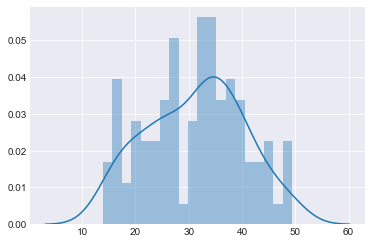

In [641]:
sns.distplot(order_time, bins=20)

In [647]:
sum([1 if i <= 45 else 0 for i in order_time])

95

In [648]:
test

{'destination_addresses': ['37 Oates Green, Red Deer, AB T4P 1V1, Canada',
  '5589 47 St, Red Deer, AB T4N 7C4, Canada',
  '4809 34 St, Red Deer, AB T4N 0P2, Canada'],
 'origin_addresses': ['4657 62 St, Red Deer, AB T4N 2R4, Canada'],
 'rows': [{'elements': [{'distance': {'text': '3.1 km', 'value': 3075},
     'duration': {'text': '7 mins', 'value': 390},
     'status': 'OK'},
    {'distance': {'text': '3.5 km', 'value': 3493},
     'duration': {'text': '8 mins', 'value': 494},
     'status': 'OK'},
    {'distance': {'text': '4.3 km', 'value': 4315},
     'duration': {'text': '9 mins', 'value': 539},
     'status': 'OK'}]}],
 'status': 'OK'}

In [631]:
rd[['LAT', 'LON']].sample(n=3)

,LAT,LON
46306,52.303034,-113.839764
21300,52.267205,-113.764245
3696,52.254125,-113.747339


In [609]:
sample_times[0:2]

array([datetime.datetime(2020, 4, 19, 13, 49, 53, 678514),
       datetime.datetime(2020, 4, 19, 14, 6, 46, 496420)], dtype=object)

In [539]:
bundle_size, met_sla, distance, order_time = run_simulation(100, rd, sample_times, 5, 15)

[2]

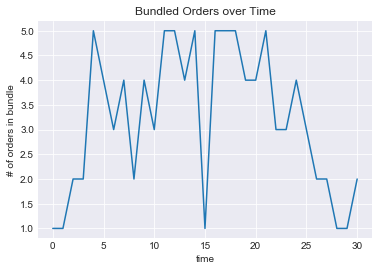

In [600]:
plt.plot(bundle_size)
plt.ylabel('# of orders in bundle')
plt.xlabel('time')
plt.title('Bundled Orders over Time')
plt.show()

In [30]:
# Max orders in an bundle timeframe****
# Avg bundle size
# Avg order trip time
# # of orders above sla
# Add a variable for driver to get to warehouse - 15 minutes
# Add a variable - Time per dropoff (1 to 2 min)
# Add a variable for bundles (20-30 min)
# Add a variable for $4 delivery
# Don't split bundles depending on wherea they are
# Add time variable to google api